In [5]:
import numpy as np
data = np.load("../data/pb1/summed_100.npy")


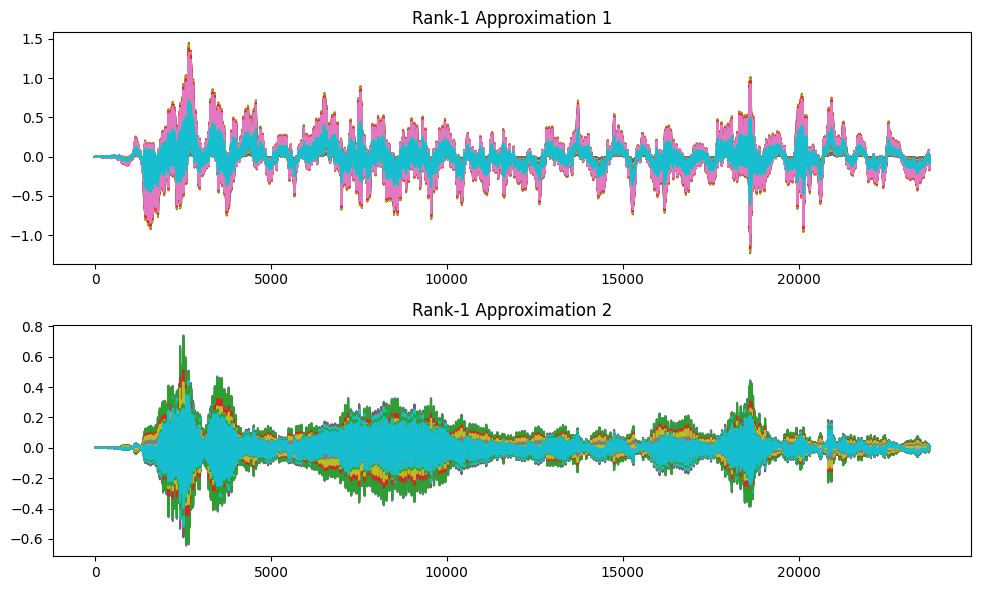

In [6]:
# Apply SVD to the matrix of mixed signals summed 100.npy, where each row cor-responds to one mixed waveform. Use the first two rank-1 approximations to reconstruct potential source signals and plot your reconstructed source signals.

import matplotlib.pyplot as plt
from scipy.linalg import svd

# Perform SVD
U, S, Vt = svd(data, full_matrices=False)
# Reconstruct the first two rank-1 approximations
rank_1_approx_1 = S[0] * np.outer(U[:, 0], Vt[0, :])
rank_1_approx_2 = S[1] * np.outer(U[:, 1], Vt[1, :])
# Plot the reconstructed source signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(rank_1_approx_1.T)
plt.title("Rank-1 Approximation 1")
plt.subplot(2, 1, 2)
plt.plot(rank_1_approx_2.T)
plt.title("Rank-1 Approximation 2")
plt.tight_layout()
plt.savefig("../output/figures/svd_source.pdf")
plt.show()

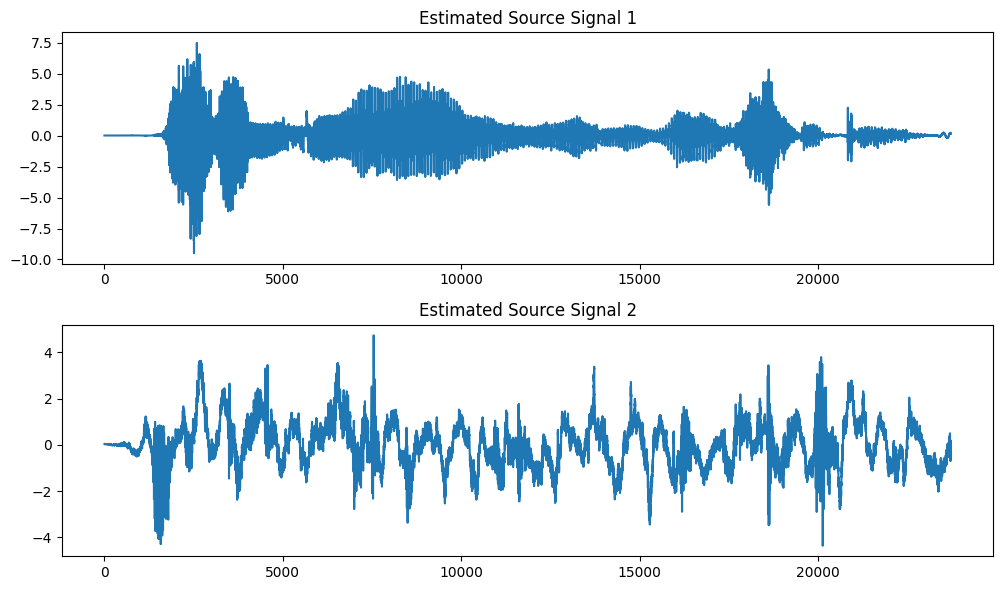

In [7]:
# Perform ICA
from sklearn.decomposition import FastICA

ica = FastICA(n_components=2)
sources = ica.fit_transform(data.T).T
# Plot the estimated source signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(sources[0])
plt.title("Estimated Source Signal 1")
plt.subplot(2, 1, 2)
plt.plot(sources[1])
plt.title("Estimated Source Signal 2")
plt.tight_layout()
plt.savefig("../output/figures/ica_sources.pdf")
plt.show()

In [8]:
# Save the reconstructed waveforms as audio files (svd source 1.wav, svd source 2.wav) and listen to evaluate the separation. Submit your audio files and plots to your TA for eval-uation.
from scipy.io.wavfile import write
sample_rate = 22050  # 假设原始rate为22050
write("../output/audio/svd_source_1.wav", sample_rate, rank_1_approx_1.mean(axis=0).astype(np.float32))
write("../output/audio/svd_source_2.wav", sample_rate, rank_1_approx_2.mean(axis=0).astype(np.float32))
write("../output/audio/ica_source_1.wav", sample_rate, sources[0].astype(np.float32))
write("../output/audio/ica_source_2.wav", sample_rate, sources[1].astype(np.float32))